<a href="https://colab.research.google.com/github/RJuro/aqm2021/blob/main/01_ex_AQM_2021_stud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sampling

We will start with a well known dataset - AirBnb (from the statistics exam E2020).
Here I just copy-paste first the loading and preprocessing bits. This includes:
- removing outliers (remove everything over 99. percentile)
- removing missing data
- some cleaning up of the price-column and recoding into floats

In [23]:
# loading packages for the day
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Indlæs data
df = pd.read_csv('https://sds-aau.github.io/IntroStat/Data/airbnb.csv.gz', compression='gzip')

#Drop variable alle host_ variable på nær host_id (den skal bruges til analyse)
#Drop også "neighbourhood", "city", 'square_feet'

# du kan bruge df.columns komando for nemmere copy-paste af variablenavne 


df.drop(['host_name', 'host_since', 'host_location',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'neighbourhood', 'city','square_feet'], axis = 'columns', inplace=True)

# Udsmid manglende værdier i variable hvor der mangler op til og med 103 observationer 
# dvs. variable med flere manglende observationer end 103 skal ikke renses for manglende observationer

df.dropna(subset=['name', 'bathrooms', 'bedrooms', 'beds'], inplace=True)

# Her omdannes "price" til en float (numerisk variabel) og får fjernet "$" og "," - det har vi gjort for jer.
df.price = df.price.replace('[\$,]', '', regex=True).astype(float)

# Med udgangspunkt i "price", beskær datasættet til 99. percentil (95 inkl.)
df = ...

Let's look at some ways to visualize the distribution of the price

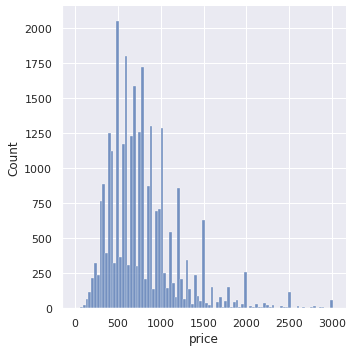

In [3]:
# histogram
...

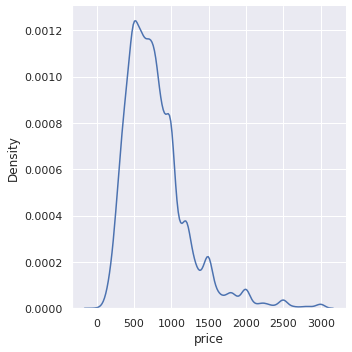

In [4]:
# density plot
...

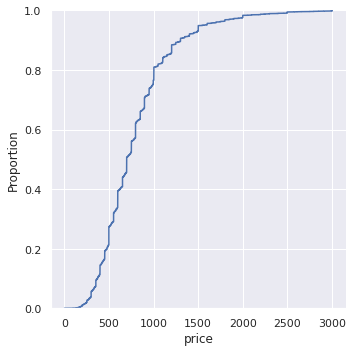

In [5]:
# empirical cumulative distribution function
...

In [6]:
# summary statistics
...

count    28064.000000
mean       794.020382
std        419.254039
min          0.000000
25%        498.000000
50%        698.000000
75%        990.000000
max       3003.000000
Name: price, dtype: float64

In [7]:
# taking a sample of 100 observations
sample = ...
sample.describe()

count     100.00000
mean      860.88000
std       514.12085
min       252.00000
25%       551.00000
50%       751.00000
75%      1003.00000
max      3003.00000
Name: price, dtype: float64

In [8]:
# taking a sample of 1000 observations
sample = ...
sample.describe()

count    1000.000000
mean      788.982000
std       430.910036
min       139.000000
25%       498.000000
50%       698.000000
75%       950.000000
max      3003.000000
Name: price, dtype: float64

### Let's experiment

In [ ]:
# let's try taking a small sample many times, where we change the number of draw and number of samples


...

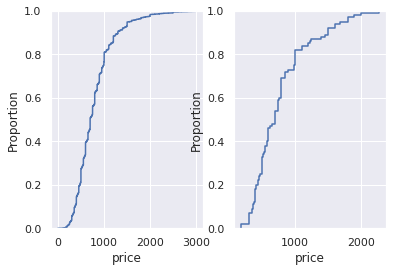

In [26]:
# comparing sample to population

fig, ax = plt.subplots(1,2)
sns.ecdfplot(df.price, ax=ax[0])
sns.ecdfplot(sample, ax=ax[1])
fig.show()

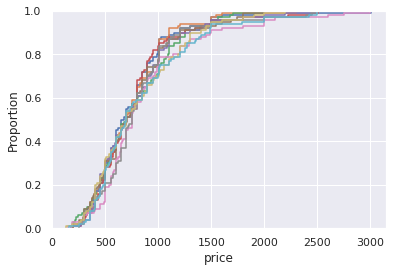

In [27]:
# Let's put more samples on the plot
fig, ax = plt.subplots()

...

plt.show()

One of the core ideas here is to figure out how much data do I need to know:
- what's the average, meadian room cost / night
- what's the probability of finding an affordable room given that I want to spend less than 1000 / night.

# Random number generation and Bernoulli trials

Let's return to random number generation from the lecture. We will use numpy's random number generation tools here rather than the more basic python random module that you have seen in the lecture.

#### Simple random number generation between 0-1 and distribution

In [35]:
# Let's try
np.random.random()

0.6279833952103759

In [36]:
# We get values between 0 and 1
np.random.random(...)

array([0.12703326, 0.76987361, 0.55492104, 0.48990229, 0.04946836,
       0.52414289, 0.61386707, 0.56355081, 0.69907717, 0.26854435])

Let's explore the distribution of what the random number generator is producing

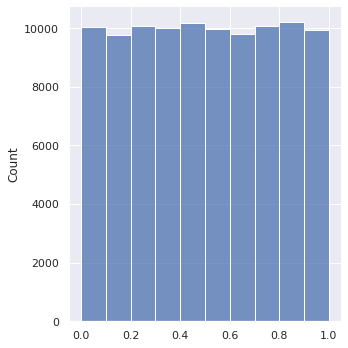

In [31]:
# Seed the random number generator - that's for reproduciability. Remember these generators are "pseudo-random"
np.random.seed(21)

# Instead of a list, we will use an empty numpy array here
random_numbers = ...
# Generate random numbers by looping over range(100000)
...

# Plot a histogram
...

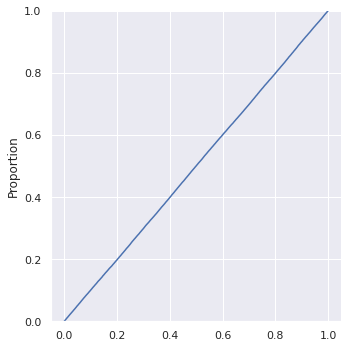

In [33]:
# and here is a ecdf version of that
...

Now, let's extend that to something where we include a probability parameter $p$ that determines the probability of sucess of a "Trial". The parameter $n$ is the number of trials. Imagine flipping a coin $n$ times knowing that it is fair $p = 0.5$ or biased/manipulated $p=0.3$

In [37]:
# We will now define a function that takes in n and p and returns the number of "sucess" cases

def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""

    # Initialize number of successes: n_success
    n_success = ... #we start at 0 and increment by one every time there is success

    # Perform trials
    for i in range(n):

        # Generate random number between zero and one: random_number
        random_number = ... # we know that already

        # If less than p, it's a success so add one to n_success
        
    return n_success

In [40]:
# Let's try

perform_bernoulli_trials(100, 0.5)

52

### Exercise: Crowdlending and defaults
A quick-loan company on a crowdlending platform has 1000 loans. On average 3% of all loans have been defaulting per year.
What's the probability that in any given year no loan defaults?

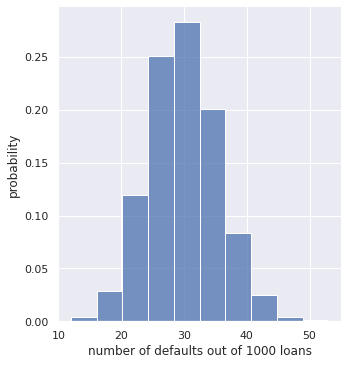

In [45]:
# Seed random number generator
np.random.seed(21)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(10000)

# Compute the number of defaults
...

In [ ]:
# Let's use seaborn to visualise that
ax = sns.displot(n_defaults, kind='hist', stat='probability', bins=10)
ax.set(xlabel='number of defaults out of 1000 loans', ylabel='probability')


# Show the plot
plt.show()

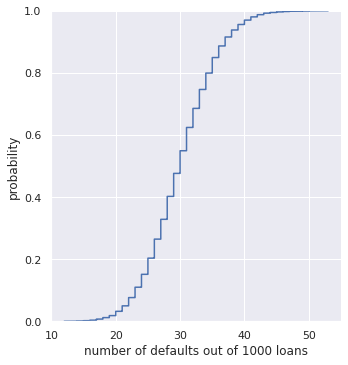

In [46]:
# Let's use seaborn to visualise that
ax = sns.displot(n_defaults, kind='ecdf')
ax.set(xlabel='number of defaults out of 1000 loans', ylabel='probability')


What's the probability of no loans defualt?
We know that we the company is going to lose money when more than 50 loans default. What's the probability of losing money?

In [54]:
# Compute the number of 10000-loan simulations with 0 defaults
no_defaults = ...

# Compute the number of 10000-loan simulations with 50 or more defaults: n_lose_money
n_lose_money = ...

# Compute and print probability of having a great year!
print('Probability of no default =', ...)

# Compute and print probability of losing money
print('Probability of losing money =', ...)


Probability of no default = 0.0
Probability of losing money = 0.001


# Binomial Distribution

What we have done so far is working with a binomial distribution. We can do the same exercise without our "self-made" fuction above.

Let's try another example:

### Car Insurance

A car insurance has 500 policies. Per year, there will be on average 1 fatal crash. The we assume that the number of crashes has a binomial distribution. What's the probability that no fatal crashes will happen in 1 year.

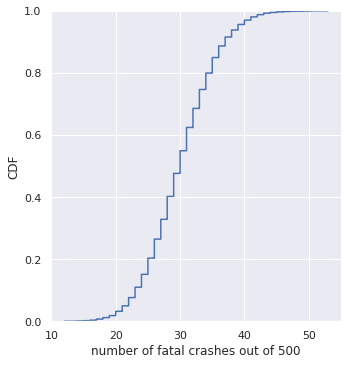

In [55]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_crashes = ...

# Plot the histogram with default number of bins; label your axes
ax = sns.displot(n_defaults, kind='ecdf')
ax.set(xlabel='number of fatal crashes out of 500', ylabel='CDF')

# Show the plot
plt.show()


In [57]:
# Compute the number of 10000-insurance simulations with 0 fatalities
no_crashes = ...

# Compute and print probability of not crashing!
print('Probability of no fatality =', ...)


Probability of no fatality = 0.3671


#### Formal add on:

Binomial coefficient (n choose k)
$
    \binom{n}{k} = \frac{n!}{k!(n-k)!}
$

The probability mass function is here the following

$ f(k, n, p) = Pr(k;n,p) = Pr(X=k) = \binom{n}{k} p^k(1-p)^{n-k}$

$p$: average probability
$k$: number of successes
$n$: number of trials

In [58]:
from sympy import *

k, n, p = symbols('k, n, p')

(factorial(n)/(factorial(k)*factorial(n-k)))*p**k*(1-p)**(n-k)

p**k*(1 - p)**(-k + n)*factorial(n)/(factorial(k)*factorial(-k + n))

In [59]:
# calculating the expected value using math...
(factorial(500)/(factorial(0)*factorial(500-0)))*1/500**0*(1-1/500)**(500-0)

0.367511254857159